# Импорт библиотек

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
from sklearn import metrics

In [154]:
import warnings
warnings.filterwarnings("ignore")

In [155]:
from sklearn.datasets import load_iris
iris = load_iris()

## Информация о представленных данных

In [156]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [157]:
iris_df = pd.DataFrame(iris.data)

In [160]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [163]:
# Делаем имена колонок такие же, как имена переменных:
iris_df.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_df['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_df['name'] = iris_df.target.apply(lambda x : iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [164]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   name               150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


## Работа с локтевым графиком

In [165]:
X = iris_df.iloc[:, [1,2,3,4]].values

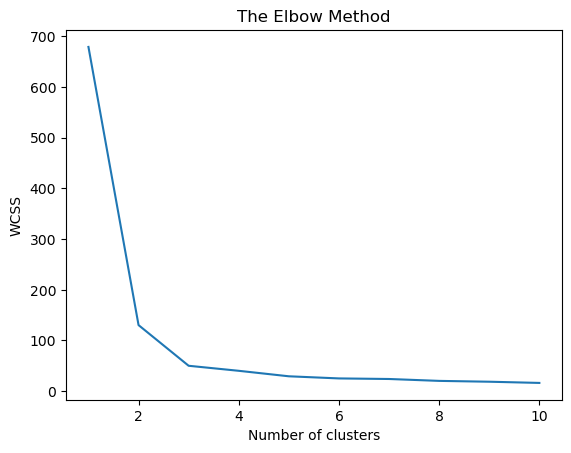

In [166]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Обучение алгоритмов кластеризации

In [168]:
num_classter = 3

In [268]:
kmeans = KMeans(init='k-means++', n_clusters=num_classter, n_init=28)

In [270]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=28)

In [271]:
pred=kmeans.fit_predict(X)

In [272]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [273]:
labels=kmeans.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [274]:
iris_df['cluster'] = pd.Series(labels)

In [275]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1
5,5.4,3.9,1.7,0.4,0,setosa,1
6,4.6,3.4,1.4,0.3,0,setosa,1
7,5.0,3.4,1.5,0.2,0,setosa,1
8,4.4,2.9,1.4,0.2,0,setosa,1
9,4.9,3.1,1.5,0.1,0,setosa,1


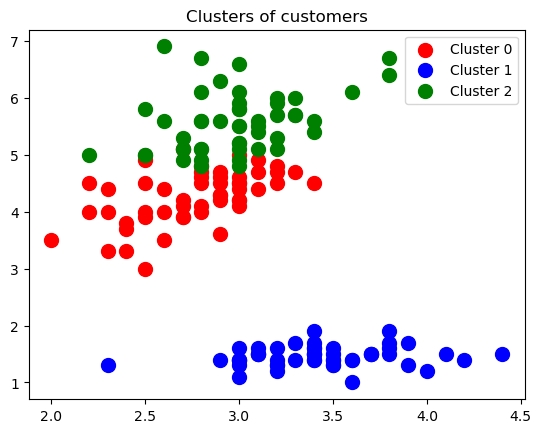

In [277]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 2')

plt.title('Clusters of customers')

plt.legend()
plt.show()

In [284]:
iris_df[iris_df['cluster']==0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster
50,7.0,3.2,4.7,1.4,1,versicolor,0
51,6.4,3.2,4.5,1.5,1,versicolor,0
52,6.9,3.1,4.9,1.5,1,versicolor,0
53,5.5,2.3,4.0,1.3,1,versicolor,0
54,6.5,2.8,4.6,1.5,1,versicolor,0
55,5.7,2.8,4.5,1.3,1,versicolor,0
56,6.3,3.3,4.7,1.6,1,versicolor,0
57,4.9,2.4,3.3,1.0,1,versicolor,0
58,6.6,2.9,4.6,1.3,1,versicolor,0
59,5.2,2.7,3.9,1.4,1,versicolor,0


In [198]:
iris_df[iris_df['cluster']==1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster
100,6.3,3.3,6.0,2.5,2,virginica,1
101,5.8,2.7,5.1,1.9,2,virginica,1
102,7.1,3.0,5.9,2.1,2,virginica,1
103,6.3,2.9,5.6,1.8,2,virginica,1
104,6.5,3.0,5.8,2.2,2,virginica,1
105,7.6,3.0,6.6,2.1,2,virginica,1
107,7.3,2.9,6.3,1.8,2,virginica,1
108,6.7,2.5,5.8,1.8,2,virginica,1
109,7.2,3.6,6.1,2.5,2,virginica,1
110,6.5,3.2,5.1,2.0,2,virginica,1


In [200]:
iris_df[iris_df['cluster']==2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,cluster
50,7.0,3.2,4.7,1.4,1,versicolor,2
51,6.4,3.2,4.5,1.5,1,versicolor,2
52,6.9,3.1,4.9,1.5,1,versicolor,2
53,5.5,2.3,4.0,1.3,1,versicolor,2
54,6.5,2.8,4.6,1.5,1,versicolor,2
55,5.7,2.8,4.5,1.3,1,versicolor,2
56,6.3,3.3,4.7,1.6,1,versicolor,2
57,4.9,2.4,3.3,1.0,1,versicolor,2
58,6.6,2.9,4.6,1.3,1,versicolor,2
59,5.2,2.7,3.9,1.4,1,versicolor,2


In [214]:
count_sort_0 = (iris_df['cluster'] == 0).sum()
print("Первый тип:", count_sort_0)

count_sort_1 = (iris_df['cluster'] == 1).sum()
print("Второй тип:" ,count_sort_1)

count_sort_2 = (iris_df['cluster'] == 2).sum()
print("Третий тип:",count_sort_2)

Первый тип: 50
Второй тип: 49
Третий тип: 51


In [230]:
scores = []
values = np.arange(2, 10)

In [232]:
for num_clusters in values:
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nКоличество кластеров =", num_clusters)
    print("Оценка силуета =", score)
                    
    scores.append(score)


Количество кластеров = 2
Оценка силуета = 0.7224743229540277

Количество кластеров = 3
Оценка силуета = 0.6554751988865172

Количество кластеров = 4
Оценка силуета = 0.5818947741897543

Количество кластеров = 5
Оценка силуета = 0.5447773072225611

Количество кластеров = 6
Оценка силуета = 0.39545853754353305

Количество кластеров = 7
Оценка силуета = 0.37587101510391807

Количество кластеров = 8
Оценка силуета = 0.36609413800025103

Количество кластеров = 9
Оценка силуета = 0.33618134528823407



Optimal number of clusters = 2


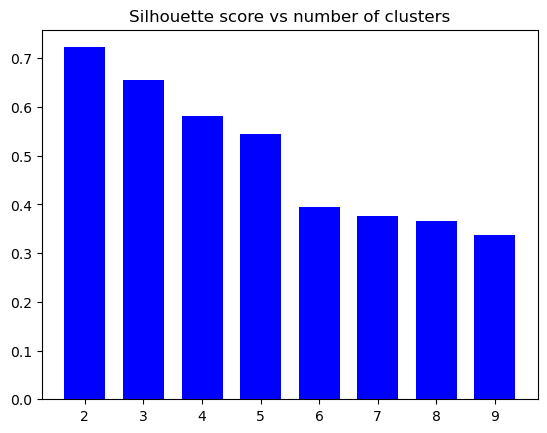

In [290]:
plt.figure()
plt.bar(values, scores, width=0.7, color='blue', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

In [292]:
metrics.calinski_harabasz_score(X, kmeans.labels_)

922.5433868511383

In [294]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.5165453892193983

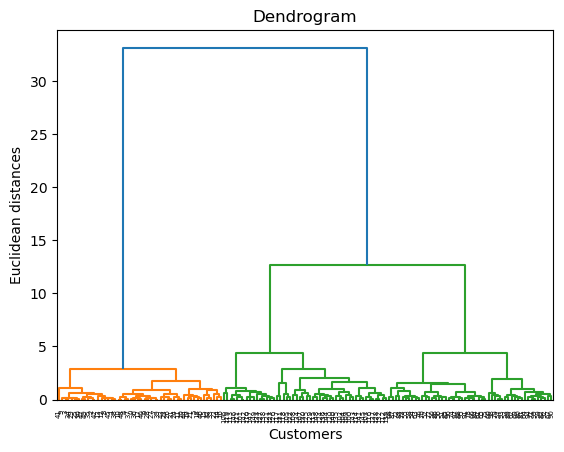

In [296]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [298]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

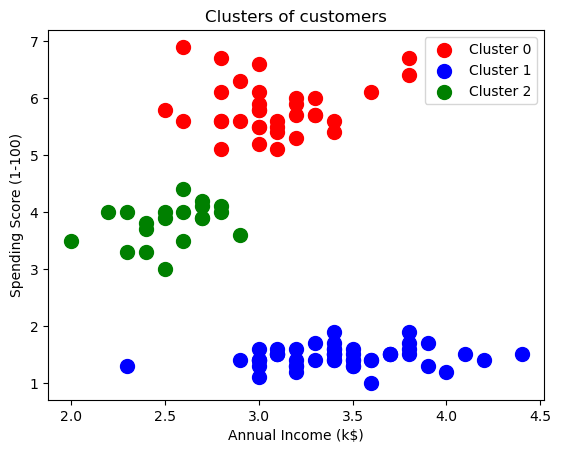

In [300]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 2')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [302]:
metrics.silhouette_score(X, y_hc)

0.5245324909381802

In [304]:
metrics.calinski_harabasz_score(X, y_hc)

753.1263388804192

In [306]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.5165453892193983

In [524]:
X = iris_df.iloc[:, [0, 2]].values

In [526]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=20, algorithm='ball_tree', metric='haversine')

In [528]:
model.fit(X)
dist, _ = model.kneighbors(X, n_neighbors=20, return_distance=True)

In [530]:
dist = dist[:, -1]

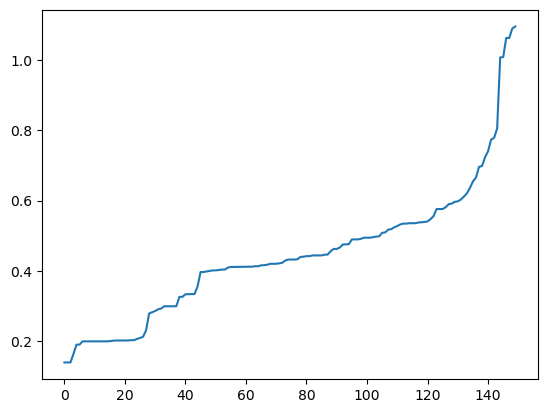

In [532]:
dist = np.sort(dist)
plt.plot(dist)

In [577]:
eps = 0.4

In [579]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.4, metric='haversine', min_samples=20)

In [581]:
labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1, -1, -1, -1, -1,  1,  0, -1,  0,  0, -1, -1,  1, -1, -1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  0,
        1, -1, -1, -1, -1, -1,  1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1],
      dtype=int64)

In [583]:
pd.Series(labels).value_counts()

-1    73
 0    56
 1    21
Name: count, dtype: int64

Text(0, 0.5, 'Spending Score (1-100)')

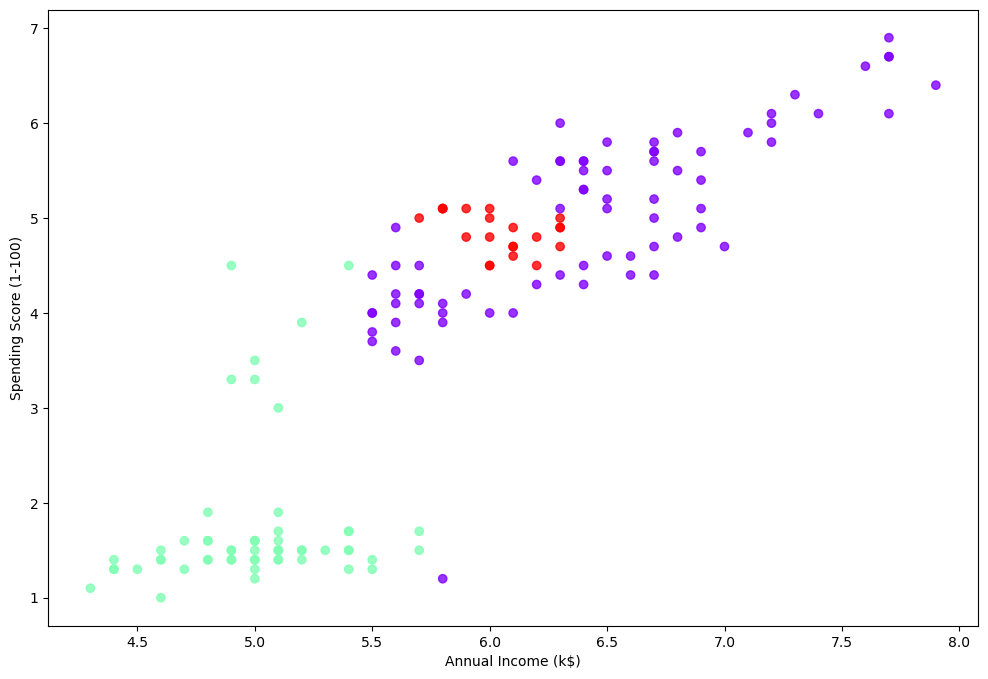

In [585]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow', alpha=0.8)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [587]:
metrics.silhouette_score(X, labels)

0.22989514387701013

In [589]:
metrics.calinski_harabasz_score(X, labels)

225.63773850701696

In [591]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.6791889248347248

In [636]:
eps = 0.4
dbscan = DBSCAN(eps=eps, min_samples=17, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.4, metric='haversine', min_samples=17)

In [638]:
labels = dbscan.labels_

In [640]:
pd.Series(labels).value_counts()

 0    80
-1    27
 1    25
 2    18
Name: count, dtype: int64

Text(0, 0.5, 'Spending Score (1-100)')

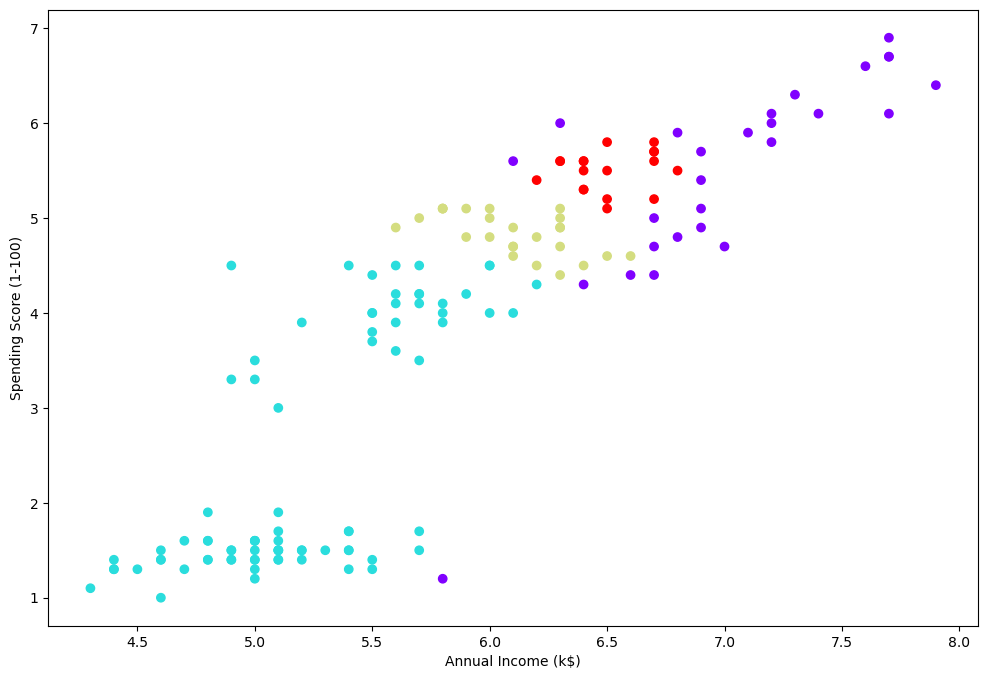

In [648]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow', alpha=1)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [651]:
pd.Series(labels).value_counts()

 0    80
-1    27
 1    25
 2    18
Name: count, dtype: int64

In [653]:
metrics.silhouette_score(X, labels)

0.21825238260334595

In [655]:
metrics.calinski_harabasz_score(X, labels)

96.60395405975099

In [657]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.6791889248347248